In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

jtplot.style()

In [2]:
def show_images(im_dict, cols, shape = (1,1), length = None, size = 8):
    if not length:
        length = len(im_dict)
    else:
        length = max(length, len(im_dict))
    w_size = shape[1] / sum(shape) * size
    h_size = shape[0] / sum(shape) * size
    rows = np.ceil(length / cols)
    fig = plt.figure(figsize=(w_size*cols, h_size*rows))
    i = 0
    for key, value in im_dict.items():
        i += 1
        sub = fig.add_subplot(rows, cols, i)
        sub.set_title(key)
        plt.axis('off')
        plt.imshow(value)
    return fig

In [3]:
fn = 'image.jpg' 
img = cv.imread(fn, 0) 

ret,image = cv.threshold(img,127,255,cv.THRESH_BINARY)


th2 = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,9,2)
th3 = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,9,2)

image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
th2 = cv.cvtColor(th2, cv.COLOR_GRAY2RGB)
th3 = cv.cvtColor(th3, cv.COLOR_GRAY2RGB)

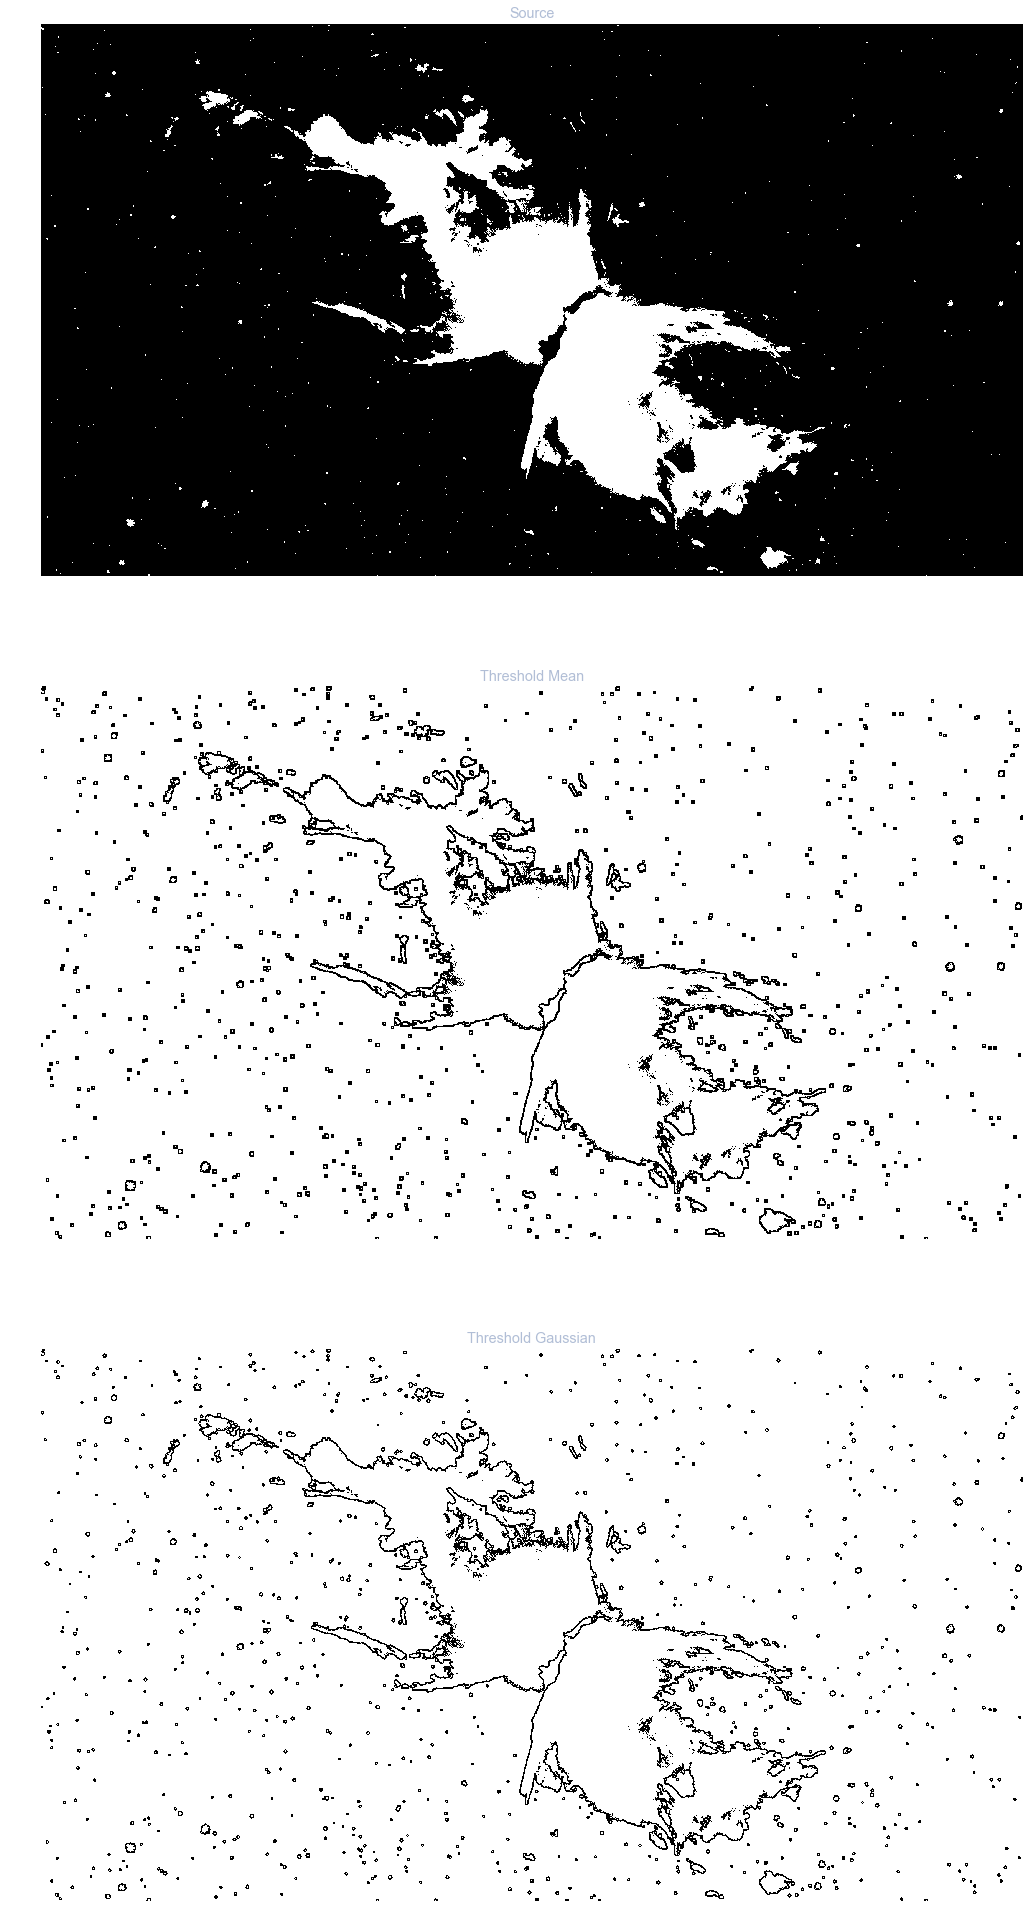

In [4]:
im_dict = {'Source':image, 'Threshold Mean':th2, 'Threshold Gaussian':th3}

cols = 1
size = 32
fig = show_images(im_dict, cols, shape = image.shape, size = size)